In [111]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic

# PassengerId: 승객의 고유 식별자.
# Survived: 생존 여부 (0: 사망, 1: 생존).
# Pclass: 티켓의 클래스 또는 객실 등급 (1, 2, 3).
# Name: 승객의 이름.
# Sex: 성별 (male 또는 female).
# Age: 승객의 나이.
# SibSp: 함께 탑승한 형제자매 또는 배우자의 수.
# Parch: 함께 탑승한 부모 또는 자녀의 수.
# Ticket: 티켓 번호.
# Fare: 지불한 운임 요금.
# Cabin: 객실 번호.
# Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton).

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [112]:
titanic.to_csv('data/titanic.csv',index=False)

gpt> 
이 코드는 Pandas 라이브러리를 사용하여 
DataFrame인 titanic을 CSV 파일로 저장하는 명령어입니다. 

여기서 to_csv 함수는 DataFrame을 CSV 파일로 변환하여 저장하는데 사용됩니다.

titanic: 
    데이터프레임(데이터의 표 형식을 갖는 자료구조)의 이름이며, 이 데이터프레임을 CSV 파일로 저장하려고 합니다.
    
'data/titanic.csv': 저장할 CSV 파일의 경로와 파일명을 나타냅니다. 
    이 경우, 'data' 폴더 안에 'titanic.csv' 파일로 저장됩니다. 
    경로를 지정하지 않으면 현재 작업 디렉토리에 파일이 저장됩니다.
    
index=False: 
    CSV 파일로 저장할 때, 기본적으로 DataFrame의 인덱스도 함께 저장됩니다.
    index=False를 사용하면 인덱스를 저장하지 않도록 설정합니다.
    
따라서 이 코드는 titanic 데이터프레임을 'data' 폴더 내의 'titanic.csv'라는 파일로 저장합니다. 
저장된 CSV 파일은 간단한 텍스트 편집기나 다른 데이터 분석 도구에서 열 수 있으며, 
일반적으로 데이터를 다른 환경에서 사용하거나 백업을 위해 사용됩니다.

In [113]:
## 경고 메시지 표시 안함
import warnings
warnings.filterwarnings(action='ignore')

여기서 warnings 모듈은 파이썬에서 경고 메시지를 다루는 데 사용되는 모듈입니다. 

filterwarnings 함수를 사용하여 경고 메시지에 대한 필터링을 설정할 수 있습니다.

action='ignore': 이 옵션은 경고 메시지를 무시하도록 설정합니다. 
    경고 메시지가 발생해도 출력되지 않습니다.

In [ ]:
## 데이터 전처리 

In [114]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [115]:
## age 변수를 중앙값으로 대치
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [116]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [117]:
##embarked 가판정보 열의 결측값을 최빈값으로 치환하기
titanic['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

In [118]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [119]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [120]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [121]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [122]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [123]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [124]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [125]:
titanic['deck'] = titanic['deck'].fillna('C')

In [126]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

isnull() 메서드는 데이터프레임에서 각 요소가 결측값인지 여부를 나타내는 불리언(Boolean) 값으로 이루어진 데이터프레임을 반환합니다. 
그리고 sum() 메서드는 각 열에 대해 True 값을 1로, False 값을 0으로 변환하여 열별로 합을 구합니다.

따라서 titanic.isnull().sum()은 
titanic 데이터프레임에서 각 열별로 결측값의 개수를 나타내는 시리즈(Series)를 반환합니다.

이를 통해 데이터프레임의 각 열에 대해 결측값이 몇 개 있는지 확인할 수 있습니다.

In [127]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [128]:
titanic.survived.value_counts()  ##생존 인원 수 

0    549
1    342
Name: survived, dtype: int64

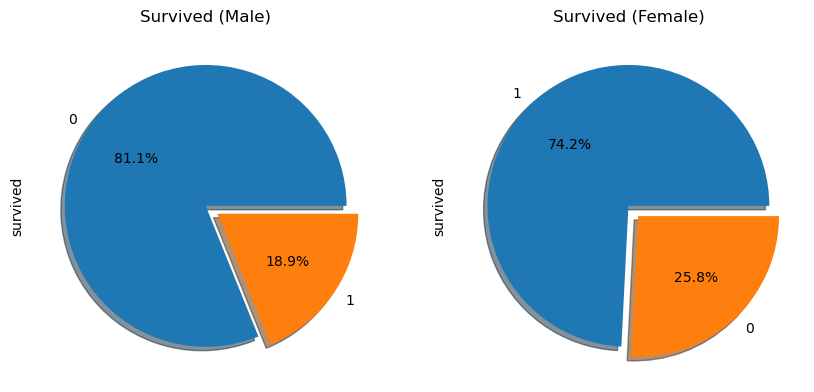

In [129]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize = (10,5))

titanic['survived'][titanic['sex'] == 'male' ].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax =ax[0], shadow = True)
                # 남성 승객의 생존율
                # explode = [0,0.1] :  두번째 조각의 돌출 정도(0~1 사이값)
        
titanic['survived'][titanic['sex'] == 'female' ].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax =ax[1], shadow = True)
                # 여성 승객의 생존율
        
ax[0].set_title('Survived (Male)')      #첫번째 차트의 제목
ax[1].set_title('Survived (Female)')  # 두번째 차트의 제목

plt.show()

gpt> 이 코드는 Matplotlib을 사용하여 성별에 따른 생존율을 파이 차트로 시각화하는 것입니다.
코드를 각 부분별로 설명하겠습니다:

Matplotlib 라이브러리 임포트:

python Copy code

import matplotlib.pyplot as plt
Matplotlib 라이브러리를 임포트합니다.

Subplots 생성:
python Copy code

f, ax = plt.subplots(1, 2, figsize=(10, 5))
subplots 함수를 사용하여 1행 2열의 subplot을 생성합니다.
figsize는 전체 그림의 크기를 지정합니다.
f는 전체 subplot figure를 나타내며, ax는 각 subplot에 대한 Axes 배열입니다.

남성 생존율 파이 차트:

python Copy code
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
남성 승객 중 생존 여부에 대한 파이 차트를 생성합니다.

explode는 각 부분이 돌출되는 정도를 나타내며,
autopct는 각 부분의 퍼센트를 표시합니다. 

ax=ax[0]는 첫 번째 subplot에 그리겠다는 것을 나타냅니다.

여성 생존율 파이 차트:

pythonCopy code

titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[1], shadow=True)
여성 승객 중 생존 여부에 대한 파이 차트를 생성합니다.

ax=ax[1]는 두 번째 subplot에 그리겠다는 것을 나타냅니다.

차트 제목 설정:

pythonCopy code
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
각 subplot에 대한 제목을 설정합니다.

플로팅 및 보여주기:

pythonCopy code
plt.show()
설정한 차트를 화면에 플로팅하고 보여줍니다.

plt.subplots 함수 설명해줘
gpt>
plt.subplots 함수는 Matplotlib에서 여러 개의 서브플롯(subplot)을 생성하는 데 사용되는 함수입니다. 이 함수는 Figure와 Axes 객체를 반환하며, 여러 개의 서브플롯을 생성하고 배열하는 데 도움을 줍니다.

pythonCopy code
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows, ncols, figsize=(width, height))
주요 매개변수는 다음과 같습니다:

nrows: 서브플롯의 행 수를 지정합니다.
ncols: 서브플롯의 열 수를 지정합니다.
figsize: 전체 그림의 크기를 지정합니다.

sharex 및 sharey: 각각의 행 또는 열에서 축을 공유하도록 지정할 수 있습니다. 
기본값은 False입니다.

plt.subplots 함수는 Figure와 Axes 객체를 반환합니다.

fig: 전체 그림을 나타내는 Figure 객체입니다.
ax: 각 서브플롯을 나타내는 Axes 객체입니다. ax는 2차원 배열 형태가 됩니다.

예를 들어, plt.subplots(2, 2)는 2행 2열의 서브플롯을 생성합니다. 
코드에서는 fig와 ax라는 변수에 Figure와 Axes 객체를 할당합니다.


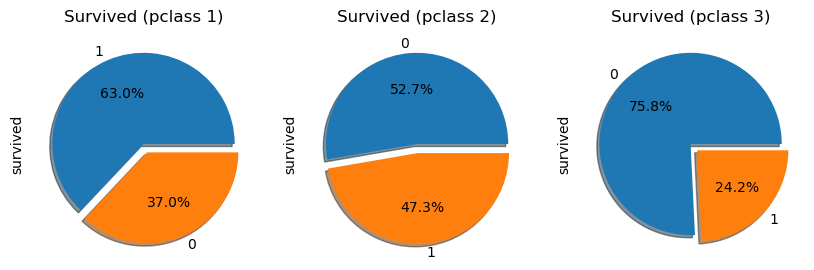

In [130]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,3,figsize = (10,5))

titanic['survived'][titanic['pclass'] == 1 ].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax =ax[0], shadow = True)
titanic['survived'][titanic['pclass'] == 2 ].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax =ax[1], shadow = True)
titanic['survived'][titanic['pclass'] == 3 ].value_counts().plot.pie(explode = [0,0.1], autopct = '%.1f%%', ax =ax[2], shadow = True)
              
       
ax[0].set_title('Survived (pclass 1)')      #첫번째 차트의 제목
ax[1].set_title('Survived (pclass 2)')    # 두번째 차트의 제목
ax[2].set_title('Survived (pclass 3)')    # 세번째 차트의 제목

plt.show()

In [131]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<function matplotlib.pyplot.show(close=None, block=None)>

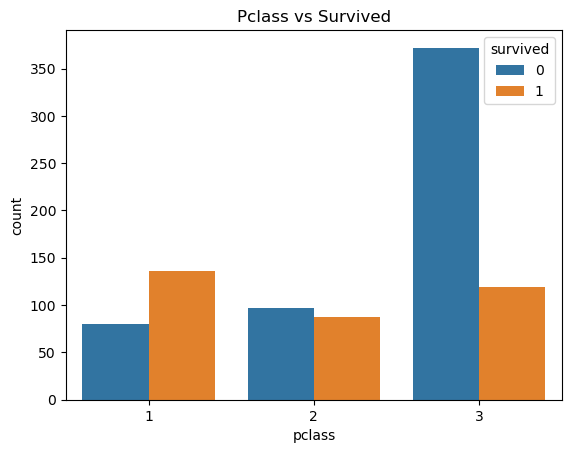

In [132]:
import seaborn as sns
sns.countplot(x='pclass', hue = 'survived', data = titanic)

plt.title('Pclass vs Survived')
plt.show

In [ ]:
ChatGPT
countplot은 Seaborn 라이브러리를 사용하여 범주형 변수의 빈도수를 시각화하는 함수입니다. 
이 코드에서는 pclass 열을 x축으로, survived 열을 hue로 사용하여 
각 객실 등급(pclass)에 대한 생존 여부(survived)를 시각화하고 있습니다.

x='pclass': x축에 표시할 데이터가 'pclass' 열의 값입니다. 이는 객실 등급을 나타냅니다.
hue='survived': survived 열의 값에 따라 색상을 다르게 표시합니다. 
    여기서는 생존 여부를 나타내며, 생존 여부에 따라 다른 색상으로 표현됩니다.
data=titanic: 사용할 데이터프레임은 titanic입니다.

<function matplotlib.pyplot.show(close=None, block=None)>

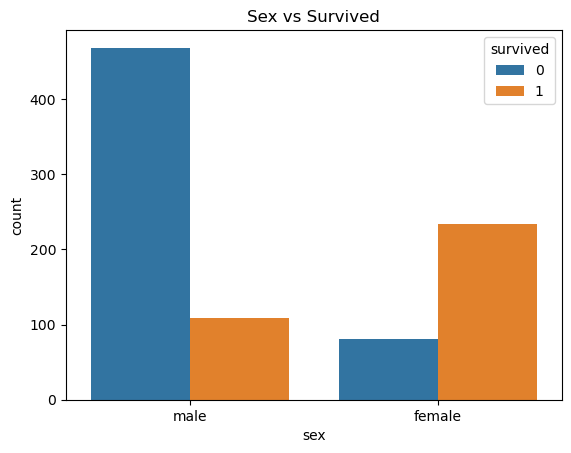

In [133]:
import seaborn as sns
sns.countplot(x=titanic['sex'], hue = 'survived', data = titanic)

plt.title('Sex vs Survived')
plt.show

ChatGPT
countplot 함수는 Seaborn 라이브러리에서 범주형 변수의 빈도수를 시각화하기 위한 함수입니다. 
기본적인 사용 방법은 다음과 같습니다:

pythonCopy code
import seaborn as sns

데이터프레임 또는 배열에서 범주형 변수의 빈도수를 시각화

sns.countplot(x='변수명', data=데이터프레임 또는 배열, ...)

여기서 주요 매개변수는 다음과 같습니다:

x: x축에 표시할 데이터(범주형 변수)의 열 이름입니다.
data: 사용할 데이터프레임이나 배열을 지정합니다.
    
hue: 그룹을 나눌 기준 변수를 지정합니다.
    예를 들어, hue='survived'와 같이 지정하면 survived 열의 값에 따라 색상을 다르게 표시합니다.
그 외에도 다양한 매개변수가 있어서 그래픽을 보다 다양하게 설정할 수 있습니다. 

간단한 예제를 통해 사용 방법을 보여드리겠습니다:

pythonCopy code
import seaborn as sns
import matplotlib.pyplot as plt

예제 데이터프레임 생성
data = {'Category': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B']}
df = pd.DataFrame(data)

countplot 그리기
sns.countplot(x='Category', data=df)

그래프 보여주기
plt.show()
이 예제에서는 'Category' 열의 값에 따라 빈도수를 나타내는 countplot이 생성됩니다.

In [ ]:
#### 데이터 모델링

In [134]:
titanic_corr = titanic.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [135]:
titanic_corr.to_csv('titanic_corr.csv', index=True)

In [136]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [137]:
titanic.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [139]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [140]:
titanic.to_csv('data/titanic0.csv',index=False)

In [141]:
import matplotlib.pyplot as plt

In [142]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

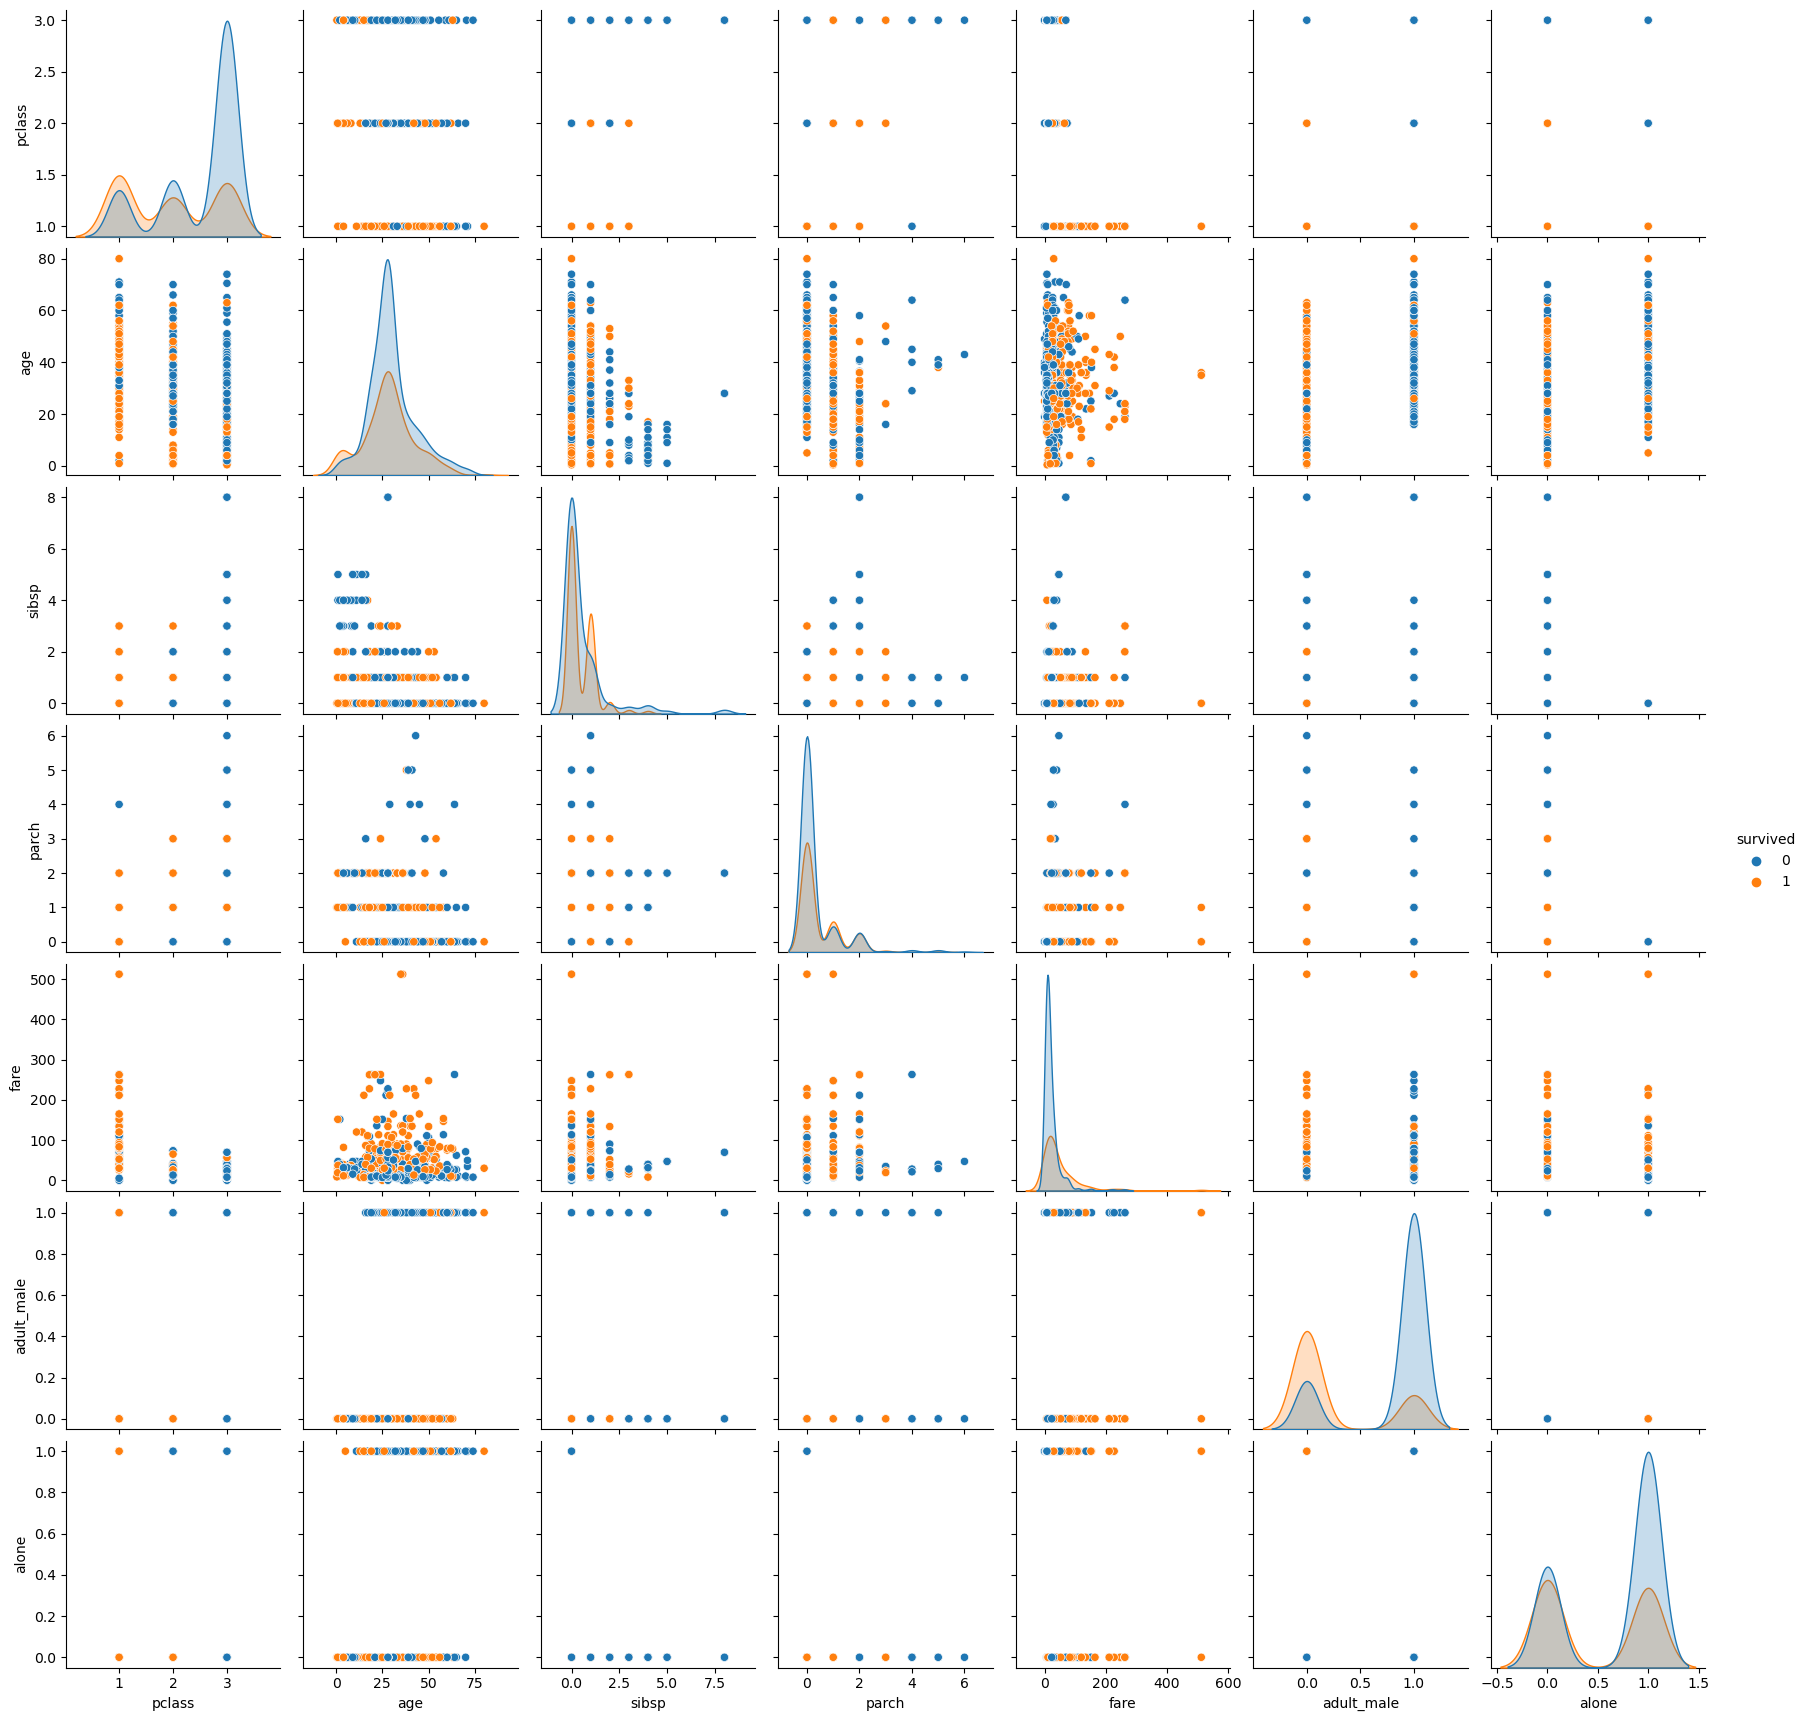

In [143]:
sns.pairplot(titanic,hue='survived')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

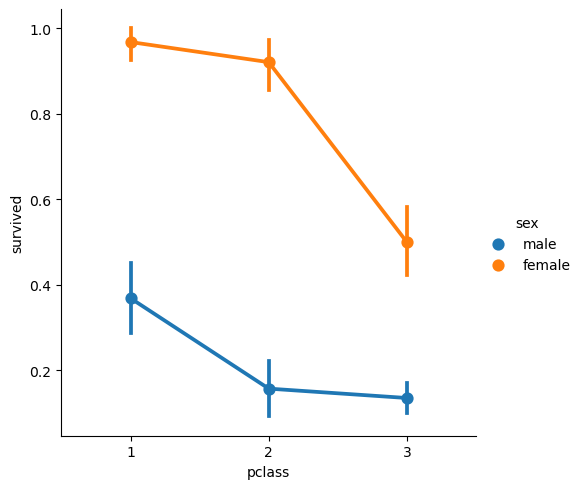

In [144]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='point')
# 범주형 데이터를 시각화
#catplot : 범주형 변수들 간의 관계를 확인할 때 활용
#pclass를 x축, survived를 축으로 설정하고, 
# 성별에 따라 다른 색상으로 점을 찍어 각 클래스와 생존 여부에 대한 관계를 시각화 

### kind='point' : point 대신, swarm, violin, bar 등을 사용할 수 있다. 

plt.show

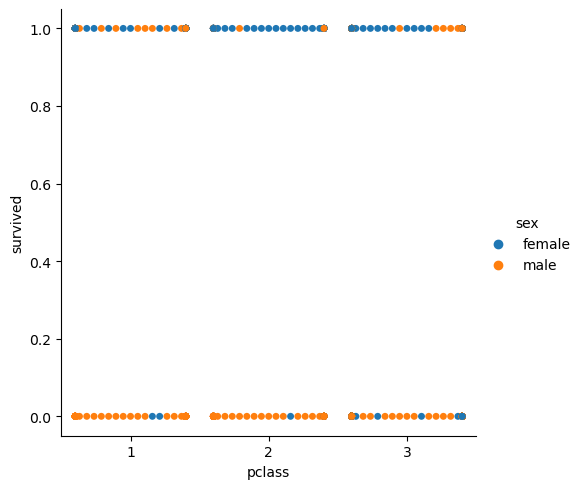

In [31]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='swarm')

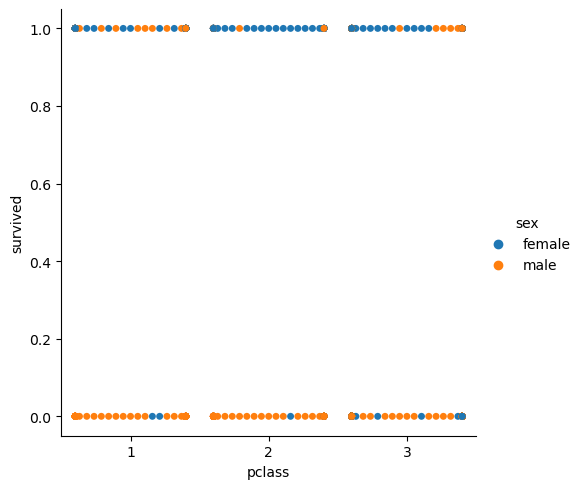

In [145]:
sns.catplot(x='pclass', y='survived', hue='sex', data = titanic,kind='swarm')

In [ ]:
## 히트맵

In [146]:
def category_age(x):
    if x< 10:
        return 0
    elif x < 20 : 
        return 1
    elif x < 30 : 
        return 2
    elif x < 40 : 
        return 3
    elif x < 50 : 
        return 4
    elif x < 60 : 
        return 5
    elif x < 70 : 
        return 6
    else:
        return 7

In [147]:
titanic['age2'] = titanic['age'].apply(category_age)

In [148]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2


In [152]:
titanic['sex'] = titanic['sex'].map({'male':1,'female':0}) # 성별을 1.0으로
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,NaN,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,NaN,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,NaN,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,NaN,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,NaN,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,NaN,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,NaN,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,NaN,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,NaN,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [153]:
titanic['family']= titanic['sibsp']+ titanic['parch']+1

#가족의 수를 구하여 family에 추가 
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,NaN,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,NaN,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,NaN,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,NaN,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,NaN,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,NaN,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,2,1
887,1,1,NaN,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,1
888,0,3,NaN,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,2,4
889,1,1,NaN,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2,1


In [154]:
titanic.to_csv('titanic3.csv',index=False)

In [155]:
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]

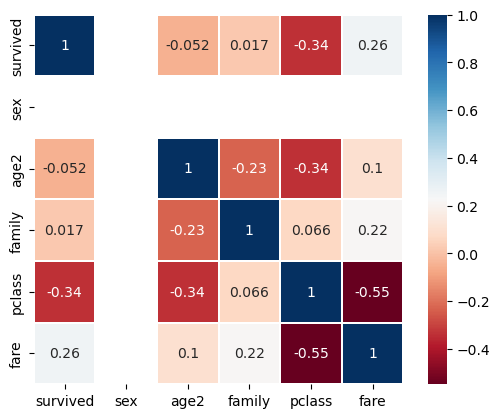

In [156]:
colormap = plt.cm.RdBu  # 컬러 맵
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1 , square = True, cmap=colormap, linecolor = 'white', annot=True)
plt.show()